In [135]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.distributions.multivariate_normal as tch
from scipy.stats import multivariate_normal

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [136]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [137]:
d0 = tch.MultivariateNormal(torch.tensor([ -1.5,  -1.5]), torch.eye(2))
d1 = tch.MultivariateNormal(torch.tensor([ 2.5,  2.5]), torch.eye(2))

In [138]:
layer = nn.Linear(2, 1)

In [139]:
print([p.data[0] for p in layer.parameters()])

[tensor([-0.2030, -0.2685]), tensor(-0.2179)]


In [140]:
opt = optim.SGD(lr=0.1, params=list(layer.parameters()))
opt

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [141]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = F.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    x, y = sample(d0, d1, 1024)
    out = F.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    opt.zero_grad()
    loss.backward()
    opt.step()

Ошибка после 0 итераций: 1.303916
Ошибка после 1 итераций: 0.018575
Ошибка после 2 итераций: 0.013872
Ошибка после 3 итераций: 0.011481
Ошибка после 4 итераций: 0.010683
Ошибка после 5 итераций: 0.009724
Ошибка после 6 итераций: 0.009668
Ошибка после 7 итераций: 0.009268
Ошибка после 8 итераций: 0.008436
Ошибка после 9 итераций: 0.008469
Ошибка после 10 итераций: 0.008321
Ошибка после 11 итераций: 0.008411
Ошибка после 12 итераций: 0.008048
Ошибка после 13 итераций: 0.008215
Ошибка после 14 итераций: 0.007616
Ошибка после 15 итераций: 0.007549
Ошибка после 16 итераций: 0.007477
Ошибка после 17 итераций: 0.007165
Ошибка после 18 итераций: 0.007587
Ошибка после 19 итераций: 0.007279


In [142]:
N = 100
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

mean0 = np.array([ -1.5,  -1.5])
mean1 = np.array([ 2.5,  2.5])
cov = np.array([[ 1. , 0.], [0.,  1.]])

d0_pdf = multivariate_normal.pdf(pos, mean0, cov)
d1_pdf = multivariate_normal.pdf(pos, mean1, cov)

x_tensor = torch.tensor(pos, dtype=torch.float)
with torch.no_grad():
    dist = F.sigmoid(layer(x_tensor)).numpy()

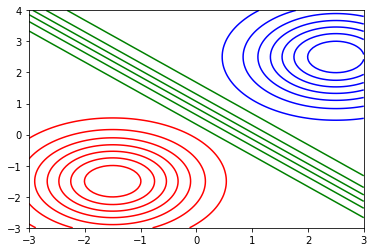

In [143]:
plt.contour(X, Y, d0_pdf, colors='red')
plt.contour(X, Y, d1_pdf, colors='blue')
plt.contour(X, Y, dist[:,:,0], colors='green')